In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data can be downloaded from https://www.insee.fr/fr/information/4470857
#! wget https://www.insee.fr/fwwr/statistiques/fichier/4470857/2020-04-10_deces_quotidiens_departement_csv.zip
#! unzip 2020-04-10_deces_quotidiens_departement_csv.zip

In [2]:
pop = pd.read_csv('datas/pop_francaise.csv',sep=';')
def population(dep):
    return int(pop['Total'][pop['Dep']=='{:02d}'.format(dep)])
def name(dep):
    return list(pop['Unnamed: 1'][pop['Dep']=='{:02d}'.format(dep)])[0]


In [7]:
df = pd.read_csv('datas/2020-05-07_deces_quotidiens_departement_csv.csv', sep=';')
df[0:10]

Date_evenement    Zone  Communes_a_envoi_dematerialise_Deces2020  \
0     01/03/2020  France                                    1624.0   
1     02/03/2020  France                                    3262.0   
2     03/03/2020  France                                    4889.0   
3     04/03/2020  France                                    6565.0   
4     05/03/2020  France                                    8189.0   
5     06/03/2020  France                                    9886.0   
6     07/03/2020  France                                   11422.0   
7     08/03/2020  France                                   12991.0   
8     09/03/2020  France                                   14659.0   
9     10/03/2020  France                                   16312.0   

   Total_deces_2020  Communes_a_envoi_dematerialise_Deces2019  \
0            1774.0                                      1708   
1            3552.0                                      3467   
2            5311.0                                      5035   
3            7112.0                                      6747   
4            8879.0                                      8455   
5           10716.0                                     10178   
6           12397.0                                     11857   
7           14101.0                                     13513   
8           15911.0                                     15131   
9           17731.0                                     16653   

   Total_deces_2019  Communes_a_envoi_dematerialise_Deces2018  \
0              1872                                      1928   
1              3782                                      3933   
2              5530                                      5881   
3              7410                                      7768   
4              9278                                      9770   
5             11148                                     11732   
6             13007                                     13616   
7             14808                                     15543   
8             16581                                     17430   
9             18248                                     19325   

   Total_deces_2018  
0              2136  
1              4327  
2              6455  
3              8545  
4             10746  
5             12904  
6             14959  
7             17066  
8             19115  
9             21201

In [20]:
def legend():
    xticks_list = ['{}/{}'.format(jour,mois) for mois in range(3,6) for jour in range(1,31)]
    xticks = plt.xticks()[0][1:-1]
    plt.xticks(xticks, [xticks_list[int(i)] for i in xticks])
    plt.legend()

In [21]:
deads = dict([])
for year in [2018, 2019, 2020]:
    for departement in range(96):
        deads[(departement,year)] = np.array(df[df['Zone']=='Dept_{:02d}'.format(departement)]['Total_deces_{}'.format(year)])

# Visualisation de la mortalité journalière (chiffres INSEE) 
Pour les départements touchés: on voit bien la surmotalité due au Covid (la surmotalité commence entre le 10 mars ou 20 mars selon les département)

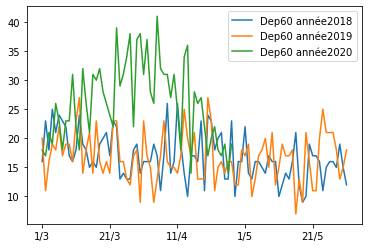

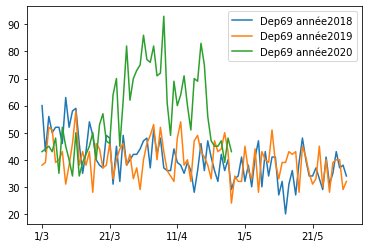

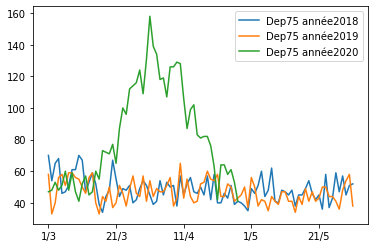

In [22]:
for departement in [38, 60, 68, 69, 75, 93]:
    plt.figure()
    for year in [2018,2019,2020]:
        plt.plot(np.diff(deads[(departement,year)]), label='Dep{} année{}'.format(departement,year))
    legend()

In [23]:
def surmortalite(dep, year):
    return deads[(dep,2020)] - deads[(dep,year)]
def plot_surmortalite(dep):
    p = plt.plot(surmortalite(dep, 2018), '-',  label='Dep{} (rap à 2018)'.format(dep))
    plt.plot(surmortalite(dep, 2019), '--', color=p[0].get_color(), label='Dep{} (rap à 2019'.format(dep))


In [24]:
plot_surmortalite(69)
plot_surmortalite(68)
plot_surmortalite(38)
plot_surmortalite(93)
legend()


In [28]:
m18 = np.zeros(92)
m19 = np.zeros(92)
for dep in range(1,95):
    if dep != 20:
        #m+=surmortalite(dep, 2019) - min(surmortalite(dep, 2019))
        m18+=surmortalite(dep, 2018)
        m19+=surmortalite(dep, 2019)

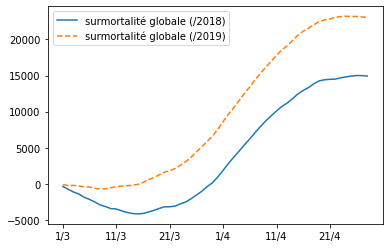

In [29]:
plt.plot(m18, '-',  label='surmortalité globale (/2018)')
plt.plot(m19, '--', label='surmortalité globale (/2019)')
legend()

## Chiffre officiels du Covid 

In [30]:
#df_covidOfficiel = pd.read_csv("modele_regional/donnees-hospitalieres-covid19-2020-04-09-19h00.csv", sep=';')
df_covidOfficiel = pd.read_csv("modele_regional/donnees-hospitalieres-covid19-2020-05-12-19h00.csv", sep=';')
df_covidOfficiel
def deaths(dep):
    indices=(df_covidOfficiel['dep']=='{:02d}'.format(dep))&(df_covidOfficiel['sexe']==0)
    dc = df_covidOfficiel[indices].dc
    return 17+np.arange(0,len(dc)), np.array(dc.array)

def plot_surmortalite_off(dep):
    plot_surmortalite(dep)
    date,dc = deaths(dep)
    plt.plot(date,dc, label = 'Chiffre SPF, dc hopitaux')

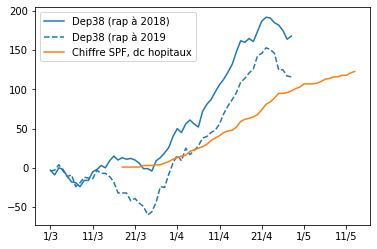

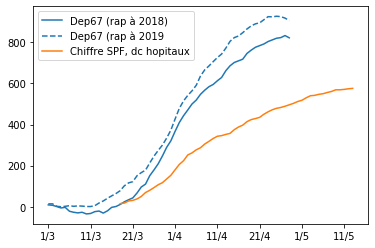

In [31]:
for dep in [38,67,68,75,93]:
    plt.figure()
    plot_surmortalite_off(dep)
    legend()

## Comparaison entre la surmortalité globale "officielle" et celle observée dans les 10 département les plus touchés

In [32]:
MARS_30 = 29
APRIL_6 = 36
APRIL_13 = 43
APRIL_19 = APRIL_6+13
APRIL_28 = APRIL_6+19

DAY = APRIL_28

year = 2019
surmort_insee = 0
surmort_hop = 0
for dep in range(1,95):
    if dep != 20:
        if surmortalite(dep, year)[DAY] > 200:
            print(dep, name(dep),'\t', int(surmortalite(dep, year)[DAY]), '  dc hop',deaths(dep)[1][DAY-18])
            surmort_insee += surmortalite(dep, year)[DAY]
            surmort_hop += deaths(dep)[1][DAY-18]
print('Total mars = ', surmort_insee, surmort_hop)


2 Aisne 	 413   dc hop 192
13 Bouches-du-Rhône 	 582   dc hop 353
21 Côte-d'Or 	 287   dc hop 200
25 Doubs 	 386   dc hop 106
28 Eure-et-Loir 	 208   dc hop 79
42 Loire 	 224   dc hop 168
51 Marne 	 353   dc hop 196
54 Meurthe-et-Moselle 	 326   dc hop 247
57 Moselle 	 957   dc hop 610
59 Nord 	 693   dc hop 403
60 Oise 	 513   dc hop 304
67 Bas-Rhin 	 925   dc hop 479
68 Haut-Rhin 	 1339   dc hop 654
69 Rhône 	 841   dc hop 454
74 Haute-Savoie 	 281   dc hop 126
75 Paris 	 1918   dc hop 1327
76 Seine-Maritime 	 289   dc hop 133
77 Seine-et-Marne 	 978   dc hop 437
78 Yvelines 	 938   dc hop 398
80 Somme 	 220   dc hop 164
88 Vosges 	 515   dc hop 222
91 Essonne 	 1047   dc hop 375
92 Hauts-de-Seine 	 1838   dc hop 776
93 Seine-Saint-Denis 	 1502   dc hop 768
94 Val-de-Marne 	 1455   dc hop 848
Total mars =  19028.0 10019


In [33]:
def total_officiel():
    res = 0
    for dep in range(1,95):
        if dep != 20:
            res += deaths(dep)[1]
    return res
def total_officiel_date(day, month):
    if month == 3:
        return total_officiel()[day-18]
    else:
        return total_officiel()[day-18+31]
total_officiel_date(30, 3)

2871

In [34]:
deps = [dep for dep in range(1,95) if dep!=20]
dc_insee = [surmortalite(dep, 2019)[DAY] for dep in deps]
plt.plot(deps, dc_insee)
dc_hop = np.array([deaths(dep)[1][DAY-18] for dep in deps])
plt.plot(deps, dc_hop)

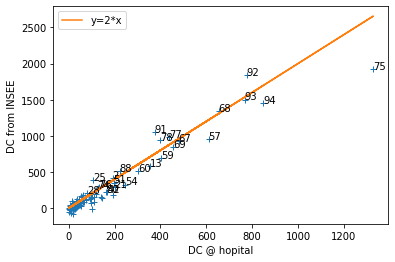

In [35]:
plt.plot(dc_hop, dc_insee, '+')
#plt.plot(dc_hop, dc_hop)
plt.plot(dc_hop, 2*dc_hop, label='y=2*x')
plt.legend()
plt.xlabel('DC @ hopital')
plt.ylabel('DC from INSEE')
for dep,dcH,dcI in zip(deps,dc_hop,dc_insee):
    if dcI > 200:
        plt.text(dcH,dcI,'{}'.format(dep))


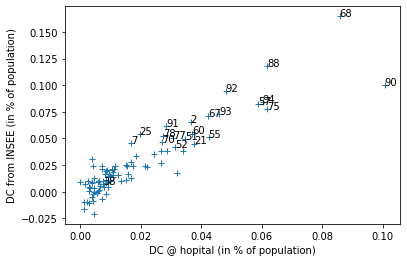

In [36]:
dc_insee_normalise = [100*surmortalite(dep, 2019)[APRIL_13]/population(dep) for dep in deps]
dc_hop_normalise = np.array([100*deaths(dep)[1][DAY-18]/population(dep) for dep in deps])

plt.plot(dc_hop_normalise, dc_insee_normalise, '+')
#plt.plot(dc_hop, dc_hop)
#plt.plot(dc_hop, 2*dc_hop)
plt.xlabel('DC @ hopital (in % of population)')
plt.ylabel('DC from INSEE (in % of population)')
for dep,dcH,dcI in zip(deps,dc_hop_normalise,dc_insee_normalise):
    if dcI > .04 or dep==38:
        plt.text(dcH,dcI,'{}'.format(dep))

In [37]:
sum([max(dci,dch) for dci,dch in zip(dc_insee,dc_hop)]),sum(dc_insee), sum(dc_hop)

(24054.0, 23169.0, 13235)